# Task 1

## Task 1.1

PyTorch Version: 2.0.1


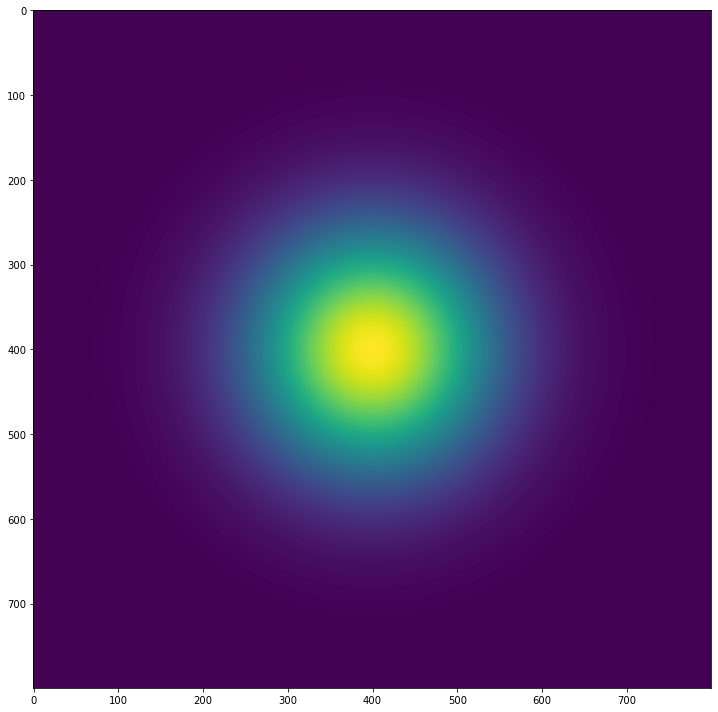

In [1]:
# Manual Task
import torch
import numpy as np
import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("PyTorch Version:", torch.__version__)

# grid for computing image, subdivide the space 
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]

# load into PyTorch tensors 
x = torch.Tensor(X)
y = torch.Tensor(Y)

# transfer to the GPU device 
x = x.to(device)
y = y.to(device)

# Compute Gaussian 
z = torch.exp(-(x**2+y**2)/2.0)

#plot imshow to be bigger
plt.figure(figsize=(10, 10))
plt.imshow(z.cpu().numpy(), )#Updated!
plt.tight_layout() 

# make the figure bigger
plt.show()

## Task 1.2

All tasks were done with ChatGPT 4o

https://chatgpt.com/share/689408c3-ab10-8001-947d-c2eb135b4064

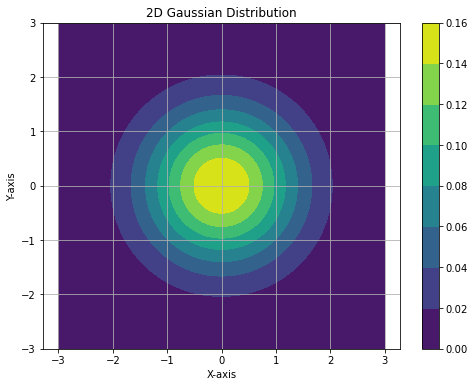

In [2]:
# AI Task
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the 2D Gaussian
mu_x = 0       # mean in x
mu_y = 0       # mean in y
sigma_x = 1    # standard deviation in x
sigma_y = 1    # standard deviation in y
rho = 0        # correlation coefficient (0 = no correlation)

# Generate a grid of (x, y) points
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Compute the 2D Gaussian function
Z = (1.0 / (2 * np.pi * sigma_x * sigma_y * np.sqrt(1 - rho**2))) * \
    np.exp(-1 / (2 * (1 - rho**2)) * (
        ((X - mu_x) ** 2) / sigma_x ** 2 +
        ((Y - mu_y) ** 2) / sigma_y ** 2 -
        (2 * rho * (X - mu_x) * (Y - mu_y)) / (sigma_x * sigma_y)
    ))

# Plot the 2D Gaussian surface
plt.figure(figsize=(8, 6))
cp = plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar(cp)
plt.title('2D Gaussian Distribution')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.axis('equal')
plt.show()


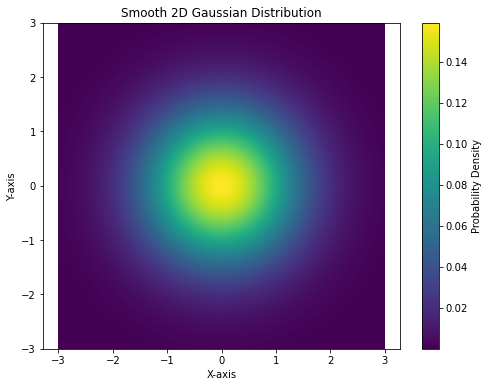

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the 2D Gaussian
mu_x = 0       # mean in x
mu_y = 0       # mean in y
sigma_x = 1    # standard deviation in x
sigma_y = 1    # standard deviation in y
rho = 0        # correlation coefficient (0 = no correlation)

# Generate a grid of (x, y) points
x = np.linspace(-3, 3, 300)  # more points = smoother image
y = np.linspace(-3, 3, 300)
X, Y = np.meshgrid(x, y)

# Compute the 2D Gaussian function
Z = (1.0 / (2 * np.pi * sigma_x * sigma_y * np.sqrt(1 - rho**2))) * \
    np.exp(-1 / (2 * (1 - rho**2)) * (
        ((X - mu_x) ** 2) / sigma_x ** 2 +
        ((Y - mu_y) ** 2) / sigma_y ** 2 -
        (2 * rho * (X - mu_x) * (Y - mu_y)) / (sigma_x * sigma_y)
    ))

# Plot the 2D Gaussian using imshow for a smooth image
plt.figure(figsize=(8, 6))
plt.imshow(Z, extent=[x.min(), x.max(), y.min(), y.max()],
           origin='lower', cmap='viridis', interpolation='bilinear')
plt.colorbar(label='Probability Density')
plt.title('Smooth 2D Gaussian Distribution')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(False)
plt.axis('equal')
plt.show()


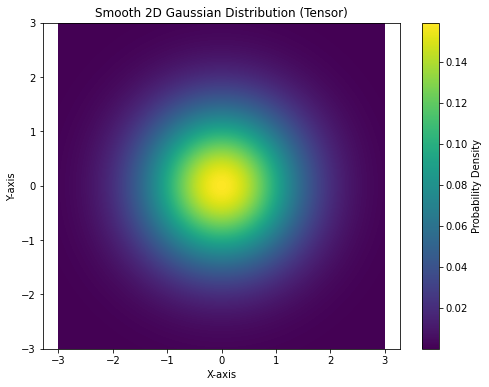

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch  # Import PyTorch

# Parameters for the 2D Gaussian
mu_x = 0
mu_y = 0
sigma_x = 1
sigma_y = 1
rho = 0

# Generate a grid of (x, y) points
x = np.linspace(-3, 3, 300)
y = np.linspace(-3, 3, 300)
X, Y = np.meshgrid(x, y)

# Compute the 2D Gaussian function in NumPy
Z_np = (1.0 / (2 * np.pi * sigma_x * sigma_y * np.sqrt(1 - rho**2))) * \
    np.exp(-1 / (2 * (1 - rho**2)) * (
        ((X - mu_x) ** 2) / sigma_x ** 2 +
        ((Y - mu_y) ** 2) / sigma_y ** 2 -
        (2 * rho * (X - mu_x) * (Y - mu_y)) / (sigma_x * sigma_y)
    ))

# Convert the NumPy array to a PyTorch tensor
Z_tensor = torch.from_numpy(Z_np).float()  # Use .float() for compatibility

# Plot the tensor using imshow (convert back to numpy for matplotlib)
plt.figure(figsize=(8, 6))
plt.imshow(Z_tensor.numpy(), extent=[x.min(), x.max(), y.min(), y.max()],
           origin='lower', cmap='viridis', interpolation='bilinear')
plt.colorbar(label='Probability Density')
plt.title('Smooth 2D Gaussian Distribution (Tensor)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')
plt.grid(False)
plt.show()


In [5]:
import torch
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Parameters for the 2D Gaussian
mu_x = 0.0
mu_y = 0.0
sigma_x = 1.0
sigma_y = 1.0
rho = 0.0

# Create 1D ranges and generate meshgrid using PyTorch
x = torch.linspace(-3, 3, 300, device=device)
y = torch.linspace(-3, 3, 300, device=device)
Y, X = torch.meshgrid(y, x, indexing='ij')  # Shape: [300, 300]

# Compute the 2D Gaussian distribution
norm_coeff = 1.0 / (2 * torch.pi * sigma_x * sigma_y * torch.sqrt(1 - rho**2))
X_mu = X - mu_x
Y_mu = Y - mu_y

Z = norm_coeff * torch.exp(
    -1 / (2 * (1 - rho**2)) * (
        (X_mu**2) / sigma_x**2 +
        (Y_mu**2) / sigma_y**2 -
        (2 * rho * X_mu * Y_mu) / (sigma_x * sigma_y)
    )
)

# Plot the result using imshow
plt.figure(figsize=(8, 6))
plt.imshow(Z.numpy(), extent=[x.min(), x.max(), y.min(), y.max()],
           origin='lower', cmap='viridis', interpolation='bilinear')
plt.colorbar(label='Probability Density')
plt.title('Smooth 2D Gaussian Distribution (Pure PyTorch)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')
plt.grid(False)
plt.show()


TypeError: sqrt(): argument 'input' (position 1) must be Tensor, not float

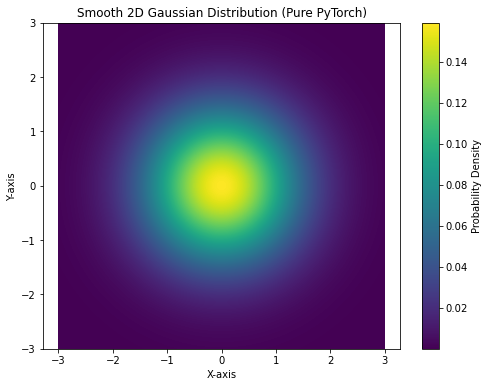

In [ ]:
import torch
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Parameters for the 2D Gaussian
mu_x = 0.0
mu_y = 0.0
sigma_x = 1.0
sigma_y = 1.0
rho = 0.0

# Create 1D ranges and generate meshgrid using PyTorch
x = torch.linspace(-3, 3, 300, device=device)
y = torch.linspace(-3, 3, 300, device=device)
Y, X = torch.meshgrid(y, x, indexing='ij')  # Shape: [300, 300]

# Compute the 2D Gaussian distribution
norm_coeff = 1.0 / (2 * torch.pi * sigma_x * sigma_y * torch.sqrt(torch.tensor(1 - rho**2)))
X_mu = X - mu_x
Y_mu = Y - mu_y

Z = norm_coeff * torch.exp(
    -1 / (2 * (1 - rho**2)) * (
        (X_mu**2) / sigma_x**2 +
        (Y_mu**2) / sigma_y**2 -
        (2 * rho * X_mu * Y_mu) / (sigma_x * sigma_y)
    )
)

# Plot the result using imshow
plt.figure(figsize=(8, 6))
plt.imshow(Z.numpy(), extent=[x.min(), x.max(), y.min(), y.max()],
           origin='lower', cmap='viridis', interpolation='bilinear')
plt.colorbar(label='Probability Density')
plt.title('Smooth 2D Gaussian Distribution (Pure PyTorch)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axis('equal')
plt.grid(False)
plt.show()


Now manually do a different sine function

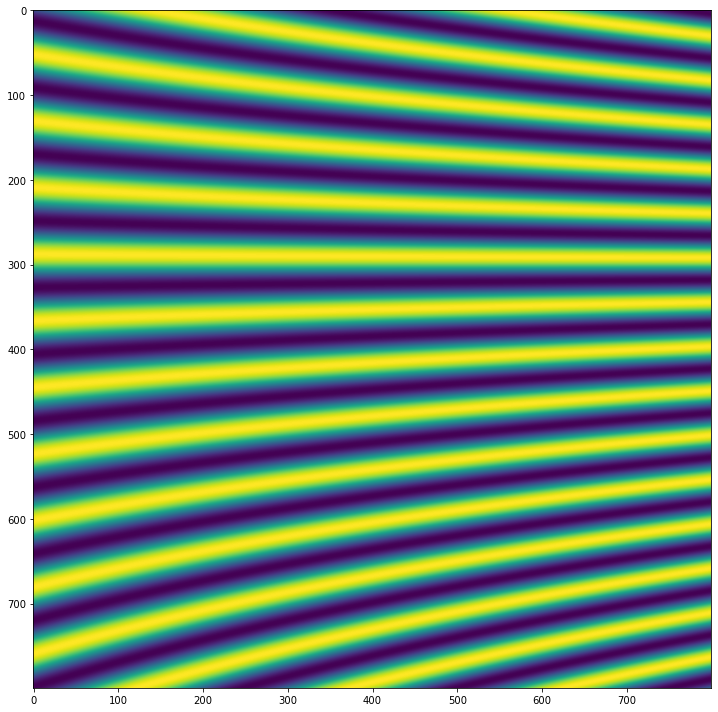

In [ ]:
# Manual Task
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# grid for computing image, subdivide the space 
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]

# load into PyTorch tensors 
x = torch.Tensor(X)
y = torch.Tensor(Y)

# transfer to the GPU device 
x = x.to(device)
y = y.to(device)

# Compute Gaussian 
z = torch.sin((10*x + y/2) + 0.5*x*y) # Only line changed from manual

#plot imshow to be bigger
plt.figure(figsize=(10, 10))
plt.imshow(z.cpu().numpy(), )#Updated!
plt.tight_layout() 

# make the figure bigger
plt.show()

## Task 1.3

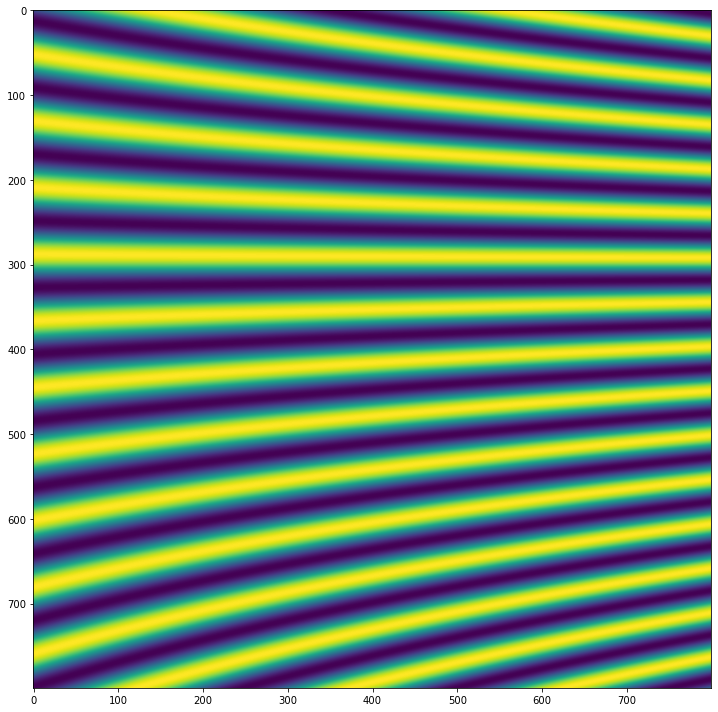

In [ ]:
# Manual Task
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# grid for computing image, subdivide the space 
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]

# load into PyTorch tensors 
x = torch.Tensor(X)
y = torch.Tensor(Y)

# transfer to the GPU device 
x = x.to(device)
y = y.to(device)

# Compute Gaussian 
z = torch.sin((10*x + y/2) + 0.5*x*y) # Only line changed from manual

#plot imshow to be bigger
plt.figure(figsize=(10, 10))
plt.imshow(z.cpu().numpy(), )#Updated!
plt.tight_layout() 

# make the figure bigger
plt.show()

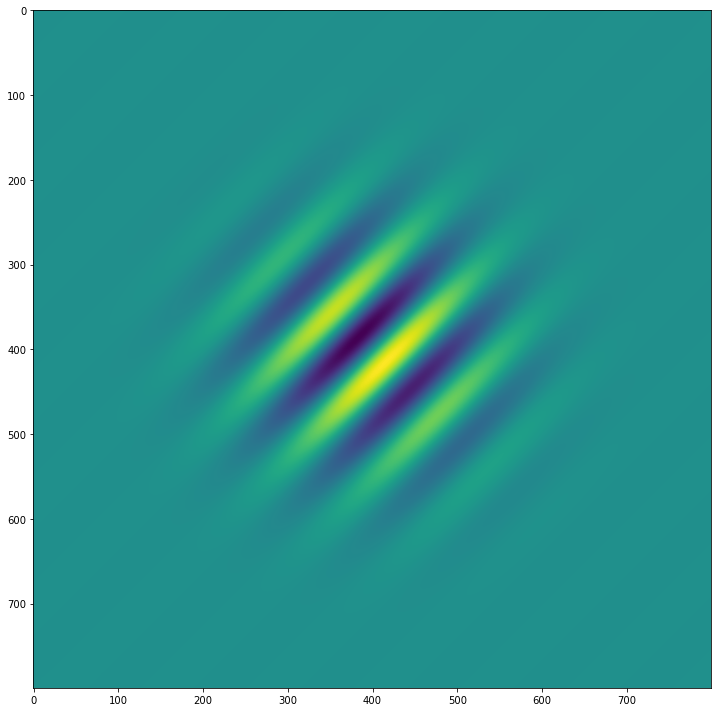

In [ ]:
# Manual Task
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# grid for computing image, subdivide the space 
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]

# load into PyTorch tensors 
x = torch.Tensor(X)
y = torch.Tensor(Y)

# transfer to the GPU device 
x = x.to(device)
y = y.to(device)

# Compute Gaussian 
z = torch.sin(5*x + 5*y) * torch.exp(-(x**2+y**2)/2.0) # Only line changed from manual

#plot imshow to be bigger
plt.figure(figsize=(10, 10))
plt.imshow(z.cpu().numpy(), )#Updated!
plt.tight_layout() 

# make the figure bigger
plt.show()

# Task 2

## Task 2.1

<ipython-input-46-fc6bf23da6f1>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


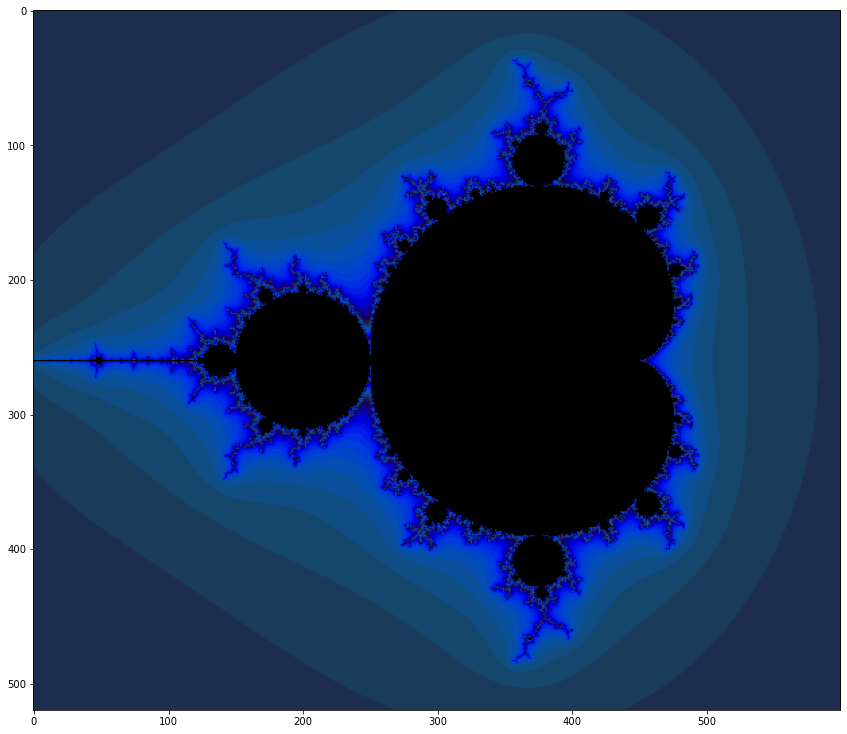

In [ ]:
# Mandelbrot Set Manual
import torch 
import numpy as np
import matplotlib.pyplot as plt

# Device configuration 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2] 
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]

# load into PyTorch tensors 
x = torch.Tensor(X)
y = torch.Tensor(Y) 
z = torch.complex(x, y) #important! 
zs = z.clone() #Updated!
ns = torch.zeros_like(z)

# transfer to the GPU device 
z = z.to(device)
zs = zs.to(device) 
ns = ns.to(device)

#Mandelbrot Set 
for i in range(200):
    #Compute the new values of z: z^2 + x 
    zs_ = zs*zs + z
    #Have we diverged with this new value? 
    not_diverged = torch.abs(zs_) < 4.0 
    #Update variables to compute
    ns += not_diverged 
    zs = zs_

#plot 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))

def processFractal(a):
    """Display an array of iteration counts as a
        colorful picture of a fractal."""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1]) 
    img = np.concatenate([10+20*np.cos(a_cyclic), 
                          30+50*np.sin(a_cyclic),
                          155-80*np.cos(a_cyclic)], 2) 
    img[a==a.max()] = 0
    a = img 
    a = np.uint8(np.clip(a, 0, 255)) 
    return a

plt.imshow(processFractal(ns.cpu().numpy())) 
plt.tight_layout(pad=0)
plt.show()

## Task 2.2

ChatGPT 4.o was used for all the generated code
https://chatgpt.com/share/68940cad-93ec-8001-b1d3-a179c225e648

Using device: cpu


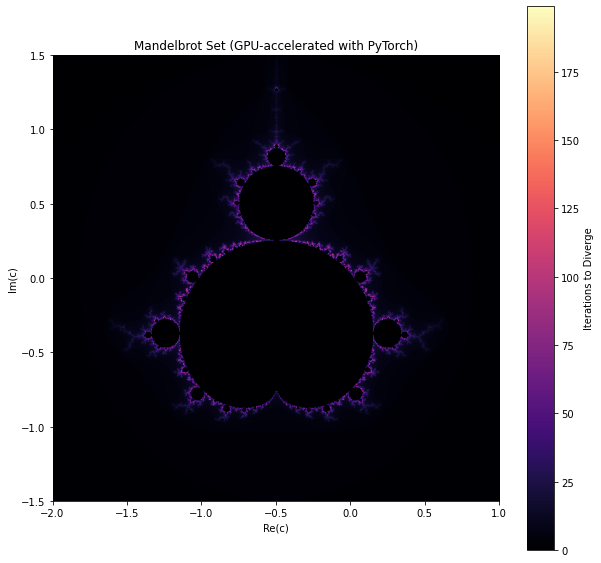

In [ ]:
# AI Generated Task
import torch
import matplotlib.pyplot as plt

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Parameters
width, height = 1000, 1000     # Image resolution
max_iter = 200                 # Max iterations per point
x_min, x_max = -2.0, 1.0       # Real axis range
y_min, y_max = -1.5, 1.5       # Imaginary axis range

# Create 2D grid of complex numbers
real = torch.linspace(x_min, x_max, width, device=device)
imag = torch.linspace(y_min, y_max, height, device=device)
X, Y = torch.meshgrid(real, imag, indexing="xy")
C = X + 1j * Y

# Initialize Z and the divergence tracker
Z = torch.zeros_like(C)
divergence_time = torch.zeros(C.shape, dtype=torch.int32, device=device)

# Mandelbrot iteration
for i in range(max_iter):
    # Find points where |Z| <= 2
    mask = torch.abs(Z) <= 2.0
    # Update Z only where it hasn't diverged
    Z[mask] = Z[mask] ** 2 + C[mask]
    # Set divergence time for newly diverged points
    divergence_time[mask & (torch.abs(Z) > 2.0)] = i

# Move data to CPU for plotting
divergence_time_cpu = divergence_time.cpu().numpy()

# Plot using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(divergence_time_cpu.T, cmap='magma', extent=(x_min, x_max, y_min, y_max))
plt.colorbar(label="Iterations to Diverge")
plt.title("Mandelbrot Set (GPU-accelerated with PyTorch)")
plt.xlabel("Re(c)")
plt.ylabel("Im(c)")
plt.show()


The reason this takes longer is mostly due to the higher resolution of the AI generated code (1000 x 1000 = 1000000 pixels versus 520 x 600 = 312000). This is why we see an almost 3x increase in compute time. There may be other small optimisation differences.

## Task 2.3

<ipython-input-74-0c9c0cd3dd8f>:47: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


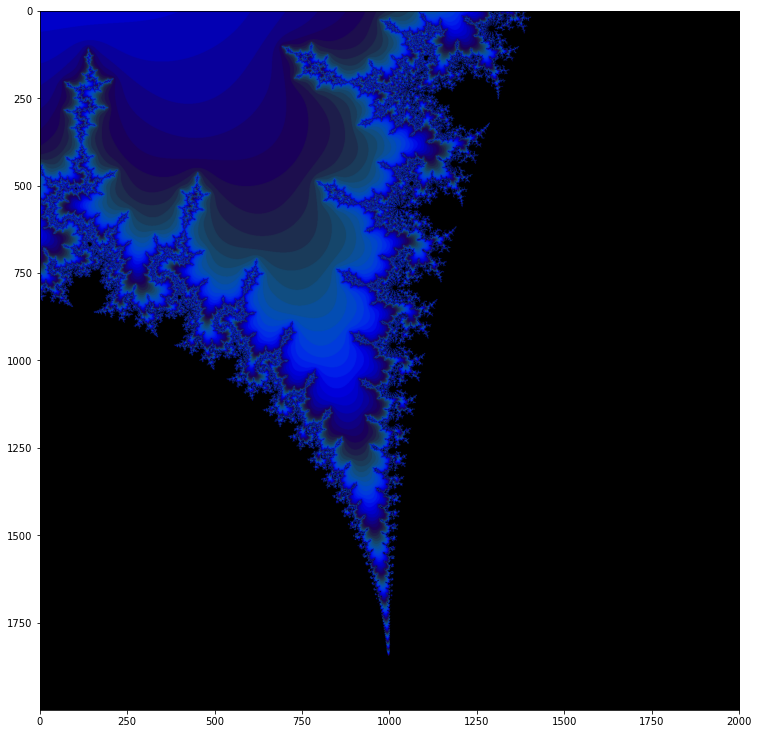

In [ ]:
# Mandelbrot Set Manual
import torch 
import numpy as np

# Device configuration 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2] 
# Y, X = np.mgrid[-1.3:1.3:0.001, -2:1:0.001]
Y, X = np.mgrid[-0.1:0:0.00005, -1.3:-1.2:0.00005]

# load into PyTorch tensors 
x = torch.Tensor(X)
y = torch.Tensor(Y) 
z = torch.complex(x, y) #important! 
zs = z.clone() #Updated!
ns = torch.zeros_like(z)

# transfer to the GPU device 
z = z.to(device)
zs = zs.to(device) 
ns = ns.to(device)

#Mandelbrot Set 
for i in range(200):
    #Compute the new values of z: z^2 + x 
    zs_ = zs*zs + z
    #Have we diverged with this new value? 
    not_diverged = torch.abs(zs_) < 4.0 
    #Update variables to compute
    ns += not_diverged 
    zs = zs_

#plot 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))

def processFractal(a):
    """Display an array of iteration counts as a
        colorful picture of a fractal."""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1]) 
    img = np.concatenate([10+20*np.cos(a_cyclic), 
                          30+50*np.sin(a_cyclic),
                          155-80*np.cos(a_cyclic)], 2) 
    img[a==a.max()] = 0
    a = img 
    a = np.uint8(np.clip(a, 0, 255)) 
    return a

plt.imshow(processFractal(ns.cpu().numpy())) 
plt.tight_layout(pad=0)
plt.show()

<ipython-input-72-ba428d1f7fb0>:47: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.uint8(np.clip(a, 0, 255))


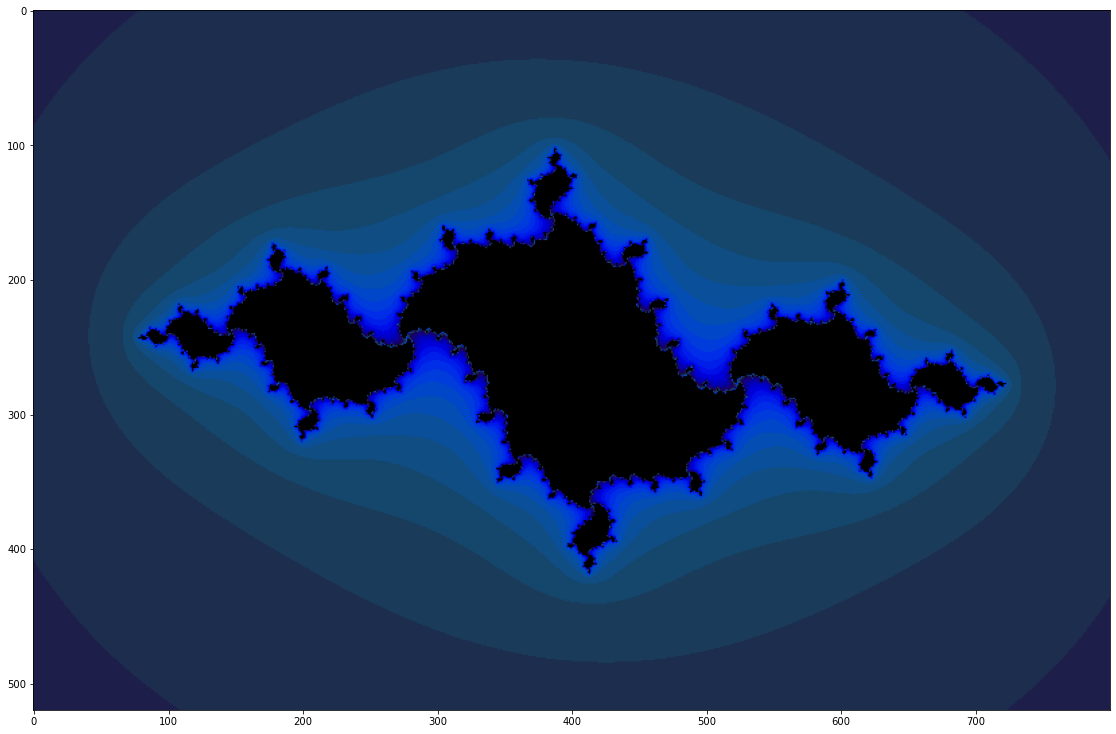

In [ ]:
# Julia Set Manual
import torch 
import numpy as np

# Device configuration 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Use NumPy to create a 2D array of complex numbers on [-2,2]x[-2,2] 
Y, X = np.mgrid[-1.3:1.3:0.005, -2:2:0.005]

# load into PyTorch tensors 
x = torch.Tensor(X)
y = torch.Tensor(Y) 
z = torch.complex(x, y) #important! 
zs = z.clone() #Updated!
ns = torch.zeros_like(z)

# transfer to the GPU device 
z = z.to(device)
zs = zs.to(device) 
ns = ns.to(device)
c = torch.complex(torch.tensor(-0.985, device=device), torch.tensor(-0.185, device=device))  # Julia Set constant

# Julia Set (z^2 + c)
for i in range(200):
    #Compute the new values of z: z^2 + x 
    zs_ = zs*zs + c
    #Have we diverged with this new value? 
    not_diverged = torch.abs(zs_) < 4.0 
    #Update variables to compute
    ns += not_diverged 
    zs = zs_

#plot 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))

def processFractal(a):
    """Display an array of iteration counts as a
        colorful picture of a fractal."""
    a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1]) 
    img = np.concatenate([10+20*np.cos(a_cyclic), 
                          30+50*np.sin(a_cyclic),
                          155-80*np.cos(a_cyclic)], 2) 
    img[a==a.max()] = 0
    a = img 
    a = np.uint8(np.clip(a, 0, 255)) 
    return a

plt.imshow(processFractal(ns.cpu().numpy())) 
plt.tight_layout(pad=0)
plt.show()

# Task 3

## Task 3.3

Text(0.5, 1.0, 'Ikeda Map (u=0.94, num_of_iterations=1000)')

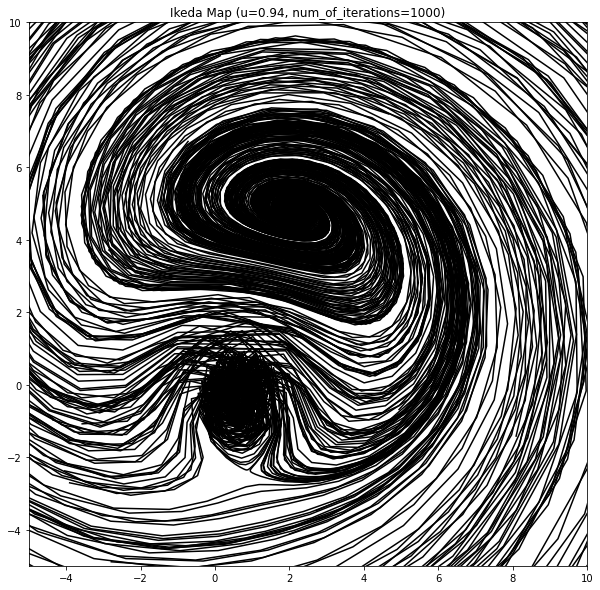

In [9]:
# Developing a new fractcal
import torch 
import numpy as np
import matplotlib.pyplot as plt
import math

# Device configuration 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Parameters
u = 0.94
spacing = 10
num_of_iterations = 1000
num_of_random_points = 150

# Randomly generate a range of points in the imaginary plane
X = spacing * np.random.randn(num_of_random_points)
Y = spacing * np.random.randn(num_of_random_points)

# Set the initial path to the first points and convert to Torch
x_path = torch.Tensor(X, device=device)
y_path = torch.Tensor(Y, device=device)
path = torch.zeros((num_of_random_points, num_of_iterations, 2), device=device)

# Iterate over the entire trajectory
for n in range(num_of_iterations):
    # Iterate 
    path[:, n, 0] = x_path
    path[:, n, 1] = y_path
    # path[:, n, :] = torch.stack((x_path, y_path), dim=1)

    t = 0.4 - 6 / (1 + x_path ** 2 + y_path ** 2)
    _x_path = 1 + u * (x_path * torch.cos(t) - y_path * torch.sin(t))
    _y_path = u * (x_path * torch.sin(t) + y_path * torch.cos(t))

    x_path = _x_path
    y_path = _y_path

plt.figure(figsize=(10, 10))

for i in range(num_of_random_points):
    plt.plot(path[i, :, 0], path[i, :, 1], "k")

plt.xlim(-5, 10)
plt.ylim(-5, 10)
plt.title(f"Ikeda Map ({u=:.2g}, {num_of_iterations=})")